## Problem2

Most cancers form a lump called a tumour. But not all lumps are cancerous. Doctors extract a sample from the lump and examine it to find out if it’s cancer or not. Lumps that are not cancerous are called benign. Lumps that are cancerous are called malignant. Obtaining incorrect results (false positives and false negatives) especially in a medical condition such as cancer is dangerous. So, perform Bagging, Boosting, Stacking, and Voting algorithms to increase model performance and provide your insights in the documentation.

In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder

data = pd.read_csv('Tumor_Ensemble.csv')
data.isnull().sum().sum()

0

In [3]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,points_worst,symmetry_worst,dimension_worst
0,87139402,B,12.32,12.39,78.85,464.1,0.10280,0.06981,0.03987,0.03700,...,13.50,15.64,86.97,549.1,0.1385,0.1266,0.12420,0.09391,0.2827,0.06771
1,8910251,B,10.60,18.95,69.28,346.4,0.09688,0.11470,0.06387,0.02642,...,11.88,22.94,78.28,424.8,0.1213,0.2515,0.19160,0.07926,0.2940,0.07587
2,905520,B,11.04,16.83,70.92,373.2,0.10770,0.07804,0.03046,0.02480,...,12.41,26.44,79.93,471.4,0.1369,0.1482,0.10670,0.07431,0.2998,0.07881
3,868871,B,11.28,13.39,73.00,384.8,0.11640,0.11360,0.04635,0.04796,...,11.92,15.77,76.53,434.0,0.1367,0.1822,0.08669,0.08611,0.2102,0.06784
4,9012568,B,15.19,13.21,97.65,711.8,0.07963,0.06934,0.03393,0.02657,...,16.20,15.73,104.50,819.1,0.1126,0.1737,0.13620,0.08178,0.2487,0.06766


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 569 non-null    int64  
 1   diagnosis          569 non-null    object 
 2   radius_mean        569 non-null    float64
 3   texture_mean       569 non-null    float64
 4   perimeter_mean     569 non-null    float64
 5   area_mean          569 non-null    float64
 6   smoothness_mean    569 non-null    float64
 7   compactness_mean   569 non-null    float64
 8   concavity_mean     569 non-null    float64
 9   points_mean        569 non-null    float64
 10  symmetry_mean      569 non-null    float64
 11  dimension_mean     569 non-null    float64
 12  radius_se          569 non-null    float64
 13  texture_se         569 non-null    float64
 14  perimeter_se       569 non-null    float64
 15  area_se            569 non-null    float64
 16  smoothness_se      569 non

In [15]:
#drop id
data = data.iloc[:,1:32]

In [16]:
data.shape

(569, 31)

In [17]:
data.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'points_mean', 'symmetry_mean', 'dimension_mean', 'radius_se',
       'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'points_se', 'symmetry_se',
       'dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst',
       'area_worst', 'smoothness_worst', 'compactness_worst',
       'concavity_worst', 'points_worst', 'symmetry_worst', 'dimension_worst'],
      dtype='object')

In [18]:
# Label encode Class variable
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
data['diagnosis'] = encoder.fit_transform(data['diagnosis'])

In [19]:
data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,points_worst,symmetry_worst,dimension_worst
0,0,12.32,12.39,78.85,464.1,0.10280,0.06981,0.03987,0.03700,0.1959,...,13.50,15.64,86.97,549.1,0.1385,0.1266,0.12420,0.09391,0.2827,0.06771
1,0,10.60,18.95,69.28,346.4,0.09688,0.11470,0.06387,0.02642,0.1922,...,11.88,22.94,78.28,424.8,0.1213,0.2515,0.19160,0.07926,0.2940,0.07587
2,0,11.04,16.83,70.92,373.2,0.10770,0.07804,0.03046,0.02480,0.1714,...,12.41,26.44,79.93,471.4,0.1369,0.1482,0.10670,0.07431,0.2998,0.07881
3,0,11.28,13.39,73.00,384.8,0.11640,0.11360,0.04635,0.04796,0.1771,...,11.92,15.77,76.53,434.0,0.1367,0.1822,0.08669,0.08611,0.2102,0.06784
4,0,15.19,13.21,97.65,711.8,0.07963,0.06934,0.03393,0.02657,0.1721,...,16.20,15.73,104.50,819.1,0.1126,0.1737,0.13620,0.08178,0.2487,0.06766


In [20]:
# no zero variance
data.var()

diagnosis                 0.234177
radius_mean              12.418920
texture_mean             18.498909
perimeter_mean          590.440480
area_mean            123843.554318
smoothness_mean           0.000198
compactness_mean          0.002789
concavity_mean            0.006355
points_mean               0.001506
symmetry_mean             0.000752
dimension_mean            0.000050
radius_se                 0.076902
texture_se                0.304316
perimeter_se              4.087896
area_se                2069.431583
smoothness_se             0.000009
compactness_se            0.000321
concavity_se              0.000911
points_se                 0.000038
symmetry_se               0.000068
dimension_se              0.000007
radius_worst             23.360224
texture_worst            37.776483
perimeter_worst        1129.130847
area_worst           324167.385102
smoothness_worst          0.000521
compactness_worst         0.024755
concavity_worst           0.043524
points_worst        

In [21]:
data.diagnosis.value_counts()

0    357
1    212
Name: diagnosis, dtype: int64

In [25]:
colnames = list(data.columns)
predictors = colnames[1:31]
target = colnames[0]

In [26]:
predictors

['radius_mean',
 'texture_mean',
 'perimeter_mean',
 'area_mean',
 'smoothness_mean',
 'compactness_mean',
 'concavity_mean',
 'points_mean',
 'symmetry_mean',
 'dimension_mean',
 'radius_se',
 'texture_se',
 'perimeter_se',
 'area_se',
 'smoothness_se',
 'compactness_se',
 'concavity_se',
 'points_se',
 'symmetry_se',
 'dimension_se',
 'radius_worst',
 'texture_worst',
 'perimeter_worst',
 'area_worst',
 'smoothness_worst',
 'compactness_worst',
 'concavity_worst',
 'points_worst',
 'symmetry_worst',
 'dimension_worst']

In [27]:
target

'diagnosis'

In [28]:
X = np.array(data.iloc[:,1:31]) # Predictors 
Y = np.array(data.iloc[:,0]) # Target

In [29]:
# Splitting data into training and testing data set
from sklearn.model_selection import train_test_split
#train, test = train_test_split(data, test_size = 0.3)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)

In [30]:
X_train.shape

(455, 30)

In [31]:
Y_train.shape

(455,)

In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import linear_model, svm
from sklearn.naive_bayes import MultinomialNB as MB
from sklearn.model_selection import cross_val_score

In [34]:
clf1 = LogisticRegression()
clf2 = RandomForestClassifier()
clf3 = KNeighborsClassifier()
#clf4 = linear_model.Perceptron(tol=1e-2, random_state=0)
clf5 = svm.SVC(gamma=0.001,probability=True)
#clf6 = MB()

In [35]:
estimators = [('Logistic Regression',clf1),('Random Forest',clf2),('KNeighbors',clf3),('svm',clf5)]

### Cross Validate individual models

In [36]:
#cross validate 5 iterations and take mean of accuracy of each model
for estimator in estimators:
    x = cross_val_score(estimator[1],X_train,Y_train,cv=5,scoring='accuracy')
    print(estimator[0],np.round(np.mean(x),2))

c:\users\aanand.oradev\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\users\aanand.oradev\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://sciki

Logistic Regression 0.93
Random Forest 0.96
KNeighbors 0.93
svm 0.92


### Hard Voting (0.95)

In [37]:
from sklearn.ensemble import VotingClassifier

In [38]:
# Hard Voting
vc = VotingClassifier(estimators=estimators,voting='hard')
x = cross_val_score(vc,X_train,Y_train,cv=5,scoring='accuracy')
print(np.round(np.mean(x),2))

c:\users\aanand.oradev\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\users\aanand.oradev\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://sciki

0.95


### Soft Voting (0.94)

In [39]:
#Soft Voting
vc1 = VotingClassifier(estimators=estimators,voting='soft')
x = cross_val_score(vc1,X_train,Y_train,cv=5,scoring='accuracy')
print(np.round(np.mean(x),2))

c:\users\aanand.oradev\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\users\aanand.oradev\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://sciki

0.94


#### Using GridSearchCV (0.95)

In [40]:
from sklearn.model_selection import GridSearchCV
from mlxtend.classifier import StackingClassifier
from sklearn.naive_bayes import GaussianNB 

# Initializing models
clf6 = LogisticRegression()
clf7 = RandomForestClassifier()
clf8 = KNeighborsClassifier()
clf9 = svm.SVC(gamma=0.001,probability=True)

estimators = [('LogisticRegression',clf6),('RandomForest',clf7),('KNeighbors',clf8),('svm',clf9)]

vclf = VotingClassifier(estimators=estimators,voting='soft')

#params = {#'kneighborsclassifier__n_neighbors': [1, 5],
          #'randomforestclassifier__n_estimators': [10, 50]}

    
params = {'KNeighbors__n_neighbors': [1, 5],'RandomForest__n_estimators': [10, 50]}

grid = GridSearchCV(estimator=vclf, 
                    param_grid=params, 
                    cv=5,
                    refit=True)
grid.fit(X_train, Y_train)

cv_keys = ('mean_test_score', 'std_test_score', 'params')

for r, _ in enumerate(grid.cv_results_['mean_test_score']):
    print("%0.3f +/- %0.2f %r"
          % (grid.cv_results_[cv_keys[0]][r],
             grid.cv_results_[cv_keys[1]][r] / 2.0,
             grid.cv_results_[cv_keys[2]][r]))

print('Best parameters: %s' % grid.best_params_)
print('Accuracy: %.2f' % grid.best_score_)


c:\users\aanand.oradev\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\users\aanand.oradev\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://sciki

c:\users\aanand.oradev\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\users\aanand.oradev\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://sciki

0.930 +/- 0.02 {'KNeighbors__n_neighbors': 1, 'RandomForest__n_estimators': 10}
0.932 +/- 0.02 {'KNeighbors__n_neighbors': 1, 'RandomForest__n_estimators': 50}
0.945 +/- 0.02 {'KNeighbors__n_neighbors': 5, 'RandomForest__n_estimators': 10}
0.945 +/- 0.02 {'KNeighbors__n_neighbors': 5, 'RandomForest__n_estimators': 50}
Best parameters: {'KNeighbors__n_neighbors': 5, 'RandomForest__n_estimators': 10}
Accuracy: 0.95


c:\users\aanand.oradev\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### Stacking (0.97)

In [41]:
# Create the ensemble's base learners and meta learner
# Append base learners to a list
base_learners = []

In [42]:
clf2 = RandomForestClassifier()
clf3 = KNeighborsClassifier()
clf5 = svm.SVC(gamma=0.001,probability=True)

base_learners.append(clf2)
base_learners.append(clf3)
base_learners.append(clf5)

In [43]:
base_learners

[RandomForestClassifier(),
 KNeighborsClassifier(),
 SVC(gamma=0.001, probability=True)]

In [44]:
# Meta model using Logistic Regression
meta_learner = LogisticRegression(solver='lbfgs')
meta_learner

LogisticRegression()

In [45]:
# Create variables to store meta data and the targets
meta_data = np.zeros((len(base_learners), len(X_train)))
meta_targets = np.zeros(len(X_train))

In [46]:
from sklearn.model_selection import KFold
# Create the cross-validation folds
KF = KFold(n_splits = 5)
meta_index = 0
for train_indices, test_indices in KF.split(X_train):
    # Train each learner on the K-1 folds and create meta data for the Kth fold
    for i in range(len(base_learners)):
        learner = base_learners[i]

        learner.fit(X_train[train_indices], Y_train[train_indices])
        predictions = learner.predict_proba(X_train[test_indices])[:,0]

        meta_data[i][meta_index:meta_index+len(test_indices)] = predictions

    meta_targets[meta_index:meta_index+len(test_indices)] = Y_train[test_indices]
    meta_index += len(test_indices)


In [47]:
# Transpose the meta data to be fed into the meta learner
meta_data = meta_data.transpose()


In [48]:
# Create the meta data for the test set and evaluate the base learners
from sklearn import metrics
test_meta_data = np.zeros((len(base_learners), len(X_test)))
base_acc = []

for i in range(len(base_learners)):
    learner = base_learners[i]
    learner.fit(X_train, Y_train)
    predictions = learner.predict_proba(X_test)[:,0]
    test_meta_data[i] = predictions

    acc = metrics.accuracy_score(Y_test, learner.predict(X_test))
    base_acc.append(acc)
    
test_meta_data = test_meta_data.transpose()

In [49]:
# Fit the meta learner on the train set and evaluate it on the test set
meta_learner.fit(meta_data, meta_targets)
ensemble_predictions = meta_learner.predict(test_meta_data)

acc = metrics.accuracy_score(Y_test, ensemble_predictions)

In [50]:
# Print the results
for i in range(len(base_learners)):
    learner = base_learners[i]

    print(f'{base_acc[i]:.2f} {learner.__class__.__name__}')
    
print(f'{acc:.2f} Ensemble')

0.96 RandomForestClassifier
0.95 KNeighborsClassifier
0.94 SVC
0.97 Ensemble


#### Using GridSearchCV (0.95)

In [51]:
from sklearn.model_selection import GridSearchCV
from mlxtend.classifier import StackingClassifier
from sklearn.naive_bayes import GaussianNB 

# Initializing models
clf1 = KNeighborsClassifier()
clf2 = RandomForestClassifier()
clf3 = GaussianNB()
lr = LogisticRegression()
sclf = StackingClassifier(classifiers=[clf1, clf2, clf3], 
                          meta_classifier=lr)

params = {'kneighborsclassifier__n_neighbors': [1, 5],
          'randomforestclassifier__n_estimators': [10, 50],
          'meta_classifier__C': [0.1, 10.0]}

grid = GridSearchCV(estimator=sclf, 
                    param_grid=params, 
                    cv=5,
                    refit=True)
grid.fit(X_train, Y_train)

cv_keys = ('mean_test_score', 'std_test_score', 'params')

for r, _ in enumerate(grid.cv_results_['mean_test_score']):
    print("%0.3f +/- %0.2f %r"
          % (grid.cv_results_[cv_keys[0]][r],
             grid.cv_results_[cv_keys[1]][r] / 2.0,
             grid.cv_results_[cv_keys[2]][r]))

print('Best parameters: %s' % grid.best_params_)
print('Accuracy: %.2f' % grid.best_score_)


0.952 +/- 0.01 {'kneighborsclassifier__n_neighbors': 1, 'meta_classifier__C': 0.1, 'randomforestclassifier__n_estimators': 10}
0.954 +/- 0.01 {'kneighborsclassifier__n_neighbors': 1, 'meta_classifier__C': 0.1, 'randomforestclassifier__n_estimators': 50}
0.947 +/- 0.01 {'kneighborsclassifier__n_neighbors': 1, 'meta_classifier__C': 10.0, 'randomforestclassifier__n_estimators': 10}
0.943 +/- 0.01 {'kneighborsclassifier__n_neighbors': 1, 'meta_classifier__C': 10.0, 'randomforestclassifier__n_estimators': 50}
0.949 +/- 0.01 {'kneighborsclassifier__n_neighbors': 5, 'meta_classifier__C': 0.1, 'randomforestclassifier__n_estimators': 10}
0.947 +/- 0.01 {'kneighborsclassifier__n_neighbors': 5, 'meta_classifier__C': 0.1, 'randomforestclassifier__n_estimators': 50}
0.943 +/- 0.01 {'kneighborsclassifier__n_neighbors': 5, 'meta_classifier__C': 10.0, 'randomforestclassifier__n_estimators': 10}
0.952 +/- 0.01 {'kneighborsclassifier__n_neighbors': 5, 'meta_classifier__C': 10.0, 'randomforestclassifier_

### Bagging (0.99)

In [52]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
#from mlextend.plotting import plot_decision_regions

clftree = DecisionTreeClassifier()

In [53]:
import matplotlib.pyplot as plt
def draw_tree(clf,X,y):
    clf.fit(X,y)
    plot_tree(clf)
    plt.show()
    plot_decision_regions(X.values, y.values, clf=clf, legend=2)
    y_pred = clf.predict(X_test)
    print(accuracy_score(y_test,y_pred))

In [54]:
#draw_tree(clftree,X_train,Y_train)

In [55]:
from sklearn.ensemble import BaggingClassifier

bag_clf = BaggingClassifier(base_estimator = clftree, n_estimators = 500,
                            bootstrap = True, n_jobs = 1, random_state = 42)

bag_clf.fit(X_train, Y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=500,
                  n_jobs=1, random_state=42)

In [56]:
from sklearn.metrics import accuracy_score, confusion_matrix

# Evaluation on Training Data
confusion_matrix(Y_train, bag_clf.predict(X_train))

array([[282,   0],
       [  0, 173]], dtype=int64)

In [57]:
accuracy_score(Y_train, bag_clf.predict(X_train))

1.0

In [58]:
# Evaluation on Testing Data
confusion_matrix(Y_test, bag_clf.predict(X_test))

array([[74,  1],
       [ 0, 39]], dtype=int64)

In [59]:
accuracy_score(Y_test, bag_clf.predict(X_test))

0.9912280701754386

#### Using GridSearchCV (0.95)

In [60]:
parameters = {
    'n_estimators': [50,100,500], 
    'max_samples': [0.1,0.4,0.7,1.0],
    'bootstrap' : [True,False],
    'max_features' : [0.1,0.4,0.7,1.0]
    }

In [61]:
search = GridSearchCV(BaggingClassifier(), parameters, cv=5)

In [62]:
search.fit(X_train,Y_train)

GridSearchCV(cv=5, estimator=BaggingClassifier(),
             param_grid={'bootstrap': [True, False],
                         'max_features': [0.1, 0.4, 0.7, 1.0],
                         'max_samples': [0.1, 0.4, 0.7, 1.0],
                         'n_estimators': [50, 100, 500]})

In [63]:
#GridSearchCV(cv=5, error_score=nan,
#             estimator=BaggingClassifier(base_estimator=None, bootstrap=True,
#                                         bootstrap_features=False,
#                                         max_features=1.0, max_samples=1.0,
#                                         n_estimators=10, n_jobs=None,
#                                         oob_score=False, random_state=None,
#                                         verbose=0, warm_start=False),
#             iid='deprecated', n_jobs=None,
#             param_grid={'bootstrap': [True, False],
#                         'max_features': [0.1, 0.4, 0.7, 1.0],
#                         'max_samples': [0.1, 0.4, 0.7, 1.0],
#                         'n_estimators': [50, 100, 500]},
#             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
#             scoring=None, verbose=0)

In [64]:
search.best_params_


{'bootstrap': True,
 'max_features': 0.1,
 'max_samples': 0.7,
 'n_estimators': 100}

In [65]:
search.best_score_

0.956043956043956

### Boosting (0.99)

#### AdaBoost (0.99)

In [66]:
from sklearn.ensemble import AdaBoostClassifier
ada_clf = AdaBoostClassifier(learning_rate = 0.02, n_estimators = 5000)
ada_clf.fit(X_train, Y_train)

AdaBoostClassifier(learning_rate=0.02, n_estimators=5000)

In [67]:
from sklearn.metrics import accuracy_score, confusion_matrix
# Evaluation on Training Data
confusion_matrix(Y_train, ada_clf.predict(X_train))

array([[282,   0],
       [  0, 173]], dtype=int64)

In [68]:
accuracy_score(Y_train, ada_clf.predict(X_train))

1.0

In [69]:
# Evaluation on Testing Data
confusion_matrix(Y_test, ada_clf.predict(X_test))

array([[74,  1],
       [ 0, 39]], dtype=int64)

In [70]:
accuracy_score(Y_test, ada_clf.predict(X_test))

0.9912280701754386

#### Gradient Boosting (0.96)

In [71]:
from sklearn.ensemble import GradientBoostingClassifier

boost_clf = GradientBoostingClassifier()

boost_clf.fit(X_train, Y_train)

GradientBoostingClassifier()

In [72]:
confusion_matrix(Y_test, boost_clf.predict(X_test))

array([[71,  4],
       [ 0, 39]], dtype=int64)

In [73]:
accuracy_score(Y_test, boost_clf.predict(X_test))

0.9649122807017544

#### XGBoost (0.97)

In [74]:
#pip install xgboost
import xgboost as xgb

xgb_clf = xgb.XGBClassifier(max_depths = 5, n_estimators = 10000, learning_rate = 0.3, n_jobs = -1)
xgb_clf.fit(X_train, Y_train)

c:\users\aanand.oradev\appdata\local\programs\python\python39\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:00:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "max_depths" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[23:00:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.3, max_delta_step=0,
              max_depth=6, max_depths=5, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=10000, n_jobs=-1,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [75]:
# Evaluation on Testing Data
confusion_matrix(Y_test, xgb_clf.predict(X_test))

array([[72,  3],
       [ 0, 39]], dtype=int64)

In [76]:
accuracy_score(Y_test, xgb_clf.predict(X_test))

0.9736842105263158

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

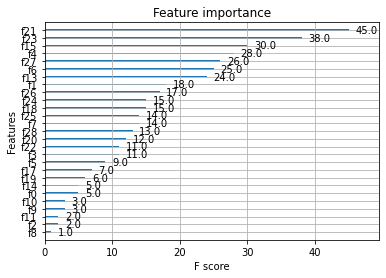

In [77]:
xgb.plot_importance(xgb_clf)

In [78]:
xgb_clf = xgb.XGBClassifier(n_estimators = 500, learning_rate = 0.1, random_state = 42)
xgb_clf.fit(X_train, Y_train)

c:\users\aanand.oradev\appdata\local\programs\python\python39\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:00:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.1, max_delta_step=0,
              max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=500, n_jobs=4,
              num_parallel_tree=1, predictor='auto', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [79]:
# Evaluation on Testing Data
confusion_matrix(Y_test, xgb_clf.predict(X_test))

array([[72,  3],
       [ 0, 39]], dtype=int64)

In [80]:
accuracy_score(Y_test, xgb_clf.predict(X_test))

0.9736842105263158

#### Using GridSearchCV (0.98)

In [81]:
param_test1 = {'max_depth': range(3,10,2), 'gamma': [0,0.3],
               'subsample': [0.8, 0.9], 'colsample_bytree': [0.8,1],
               'rag_alpha': [0, 0.1]}

In [82]:
grid_search = GridSearchCV(xgb_clf, param_test1, n_jobs = -1, cv = 5, scoring = 'accuracy')
grid_search.fit(X_train, Y_train)

c:\users\aanand.oradev\appdata\local\programs\python\python39\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:03:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "rag_alpha" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[23:03:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1,
                                     enable_categorical=False, gamma=0,
                                     gpu_id=-1, importance_type=None,
                                     interaction_constraints='',
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=6, min_child_weight=1,
                                     missing=nan, monotone_constraints='()',
                                     n_estimators=500, n_jobs=4,
                                     num_parallel_tree=1, predictor='auto',
                                     random_state=42, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, subsample=1,
                                     tree_method='exact

In [83]:
cv_xg_clf = grid_search.best_estimator_

In [84]:
cv_xg_clf

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.8,
              enable_categorical=False, gamma=0, gpu_id=-1,
              importance_type=None, interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=500, n_jobs=4, num_parallel_tree=1, predictor='auto',
              rag_alpha=0, random_state=42, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=0.8, tree_method='exact',
              validate_parameters=1, verbosity=None)

In [85]:
# Evaluation on Testing Data with model with hyperparameter
accuracy_score(Y_test, cv_xg_clf.predict(X_test))

0.9824561403508771

In [86]:
grid_search.best_params_

{'colsample_bytree': 0.8,
 'gamma': 0,
 'max_depth': 3,
 'rag_alpha': 0,
 'subsample': 0.8}

## Analysis and Conclusion

by decreasing level of accuracy  
 
1) Boosting: 0.99  
2) Bagging: 0.99  
3) Stacking: 0.97  
4) Hard Voting: 0.95   
5) Soft Voting: 0.94   
  
  
Boosting or  Bagging classifier can be chosen in this case   